## 3-coloring planar graphs without short cycles

#### Introduction

The _chromatic number_ $\chi = \chi(G)$ of a graph $G$ is the smallest number of colors that suffice to color the vertices of $G$ such that no two adjacent vertices have the same color.

4 Color Theorem: Let $G$ be a planar graph, then $\chi(G) \leq 4$.

It is NP-hard to decide if $\chi(G) \leq 3$ if _G_ is planar, but:

Let $G$ be a planar graph without cycles of lengths $4, \dots, 11$. Then $\chi(G) \leq 3$.


##### Discharging method idea (See ["Discharging method, by M. Salavatipour"](http://webdocs.cs.ualberta.ca/~mreza/talks/IPM-math06.pdf))

If this is not true and _G_ is a smallest counterexample, then there is:
1. no vertex of degree $\leq 2$ and
2. no cutvertex.

If we apply the following discharging method:
1. Assign a charge of $deg(v) - 6$ units to each vertex $v$ of $G$ and of $2 |f| - 6$ to each face $f$ of $G$.
2. Rule for discharging is: each non-triangle face sends 3/2 units to each of its vertices.

Then we come to a contradiction with the initial total charge of -12 and the final charge $\geq 0$.

#### Exercise

Write functions 
- `initial_charge(G)` which returns dicitionary with initial charges of vertices and faces
- `discharge(G, c0)` which returns dictionary with charges after discharging was applied to the initial charges `c0` (result of `initial_charge(G)`)
- `plot_charge(G, c)` which plots vertices with green color if they have non-negative charge and with red color if they are negatively charged (`c` is result of `plot_charge(G, c)`)
- `three_color(G)` which implements the following algorithm for three coloring of `G`

Use the following method to find a 3 coloring of such graphs:

```
    if G has a cutvertex v:
        find blocks B1, B2, ..., Bk
        color each block recursively
        combine colorings of blocks into coloring c of the full graph (by permuting colors 
          in each block to make v colored with the same color in each block)
    else:
        find a vertex v of degree <= 2
        color G - v recursively
        extend coloring of G - v to v to obtain coloring c of G
    return c
```
**Note:** You can use Sage built-in function `blocks_and_cut_vertices` to find cutvertices and blocks.

#### Examples

In [1]:
def faces(G):
    """
    Return faces (as "tuples" of vertices) of a planar graph G. 
    """
    G.is_planar(set_embedding=True)
    F = G.faces()
    F = [tuple(x for (x, y) in f) for f in F]
    return F

def initial_charge(G):
    """
    Return a dictionary of charges for each vertex and face
    """
    F = faces(G)    
    c = {}
    for v in G.vertices():
        c[v] = G.degree(v) - 6
    for f in F:
        c[f] = 2 * len(f) - 6
    return c

def discharge(G, c0):
    """
    Return a dictionary of charges for each vertex and face after discharging initial charges c0
    """
    c = c0.copy()
    F = faces(G)
    for f in F:
        if len(f) > 3:
            for v in f:
                c[v] += 3/2
                c[f] -= 3/2
    return c

def plot_colored_charges(G, c):
    """
    Plot negatively charged vertices of G with red and non-negatively charged vertices of G with green; 
    according to charges given by the dictionary c
    """
    v_pos = [v for v in G.vertices() if c[v] >= 0]
    v_neg = [v for v in G.vertices() if c[v] < 0]
    return G.plot(vertex_colors = {'green': v_pos, 'red': v_neg}, vertex_size=20, vertex_labels=False)

In [2]:
G = Graph('[hCGGC@?G?_@_@????G?@C?C??G??G??C??@???G???_@?@???@????_?G?G??E?')

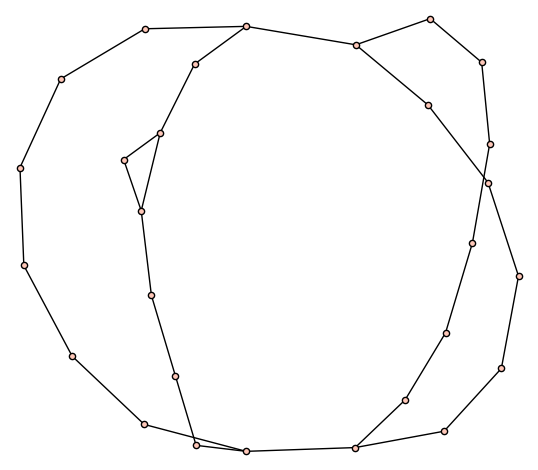

In [3]:
G.plot(vertex_size=20, vertex_labels=False)

**Note**: the graph is planar, it is just not drawn in a way that planarity is visible, try to use `G.is_planar(set_embedding=True, set_pos=True)`

In [4]:
c0 = initial_charge(G)
c = discharge(G, c0)

In [5]:
c0

{0: -4,
 1: -4,
 2: -4,
 3: -3,
 4: -4,
 5: -4,
 6: -4,
 7: -4,
 8: -4,
 9: -4,
 10: -3,
 11: -4,
 12: -4,
 13: -4,
 14: -4,
 15: -4,
 16: -3,
 17: -4,
 18: -3,
 19: -3,
 20: -4,
 21: -4,
 22: -4,
 23: -3,
 24: -4,
 25: -4,
 26: -4,
 27: -4,
 (0, 1, 2, 3, 16, 15, 14, 13, 26, 25, 24, 23, 10, 11, 12): 24,
 (0, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1): 20,
 (3, 4, 5, 6, 7, 8, 9, 10, 23, 22, 21, 20, 19, 27, 18, 17, 16): 28,
 (13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26): 22,
 (18, 27, 19): 0}

In [6]:
c

{0: -1,
 1: -1,
 2: -1,
 3: 3/2,
 4: -1,
 5: -1,
 6: -1,
 7: -1,
 8: -1,
 9: -1,
 10: 3/2,
 11: -1,
 12: -1,
 13: -1,
 14: -1,
 15: -1,
 16: 3/2,
 17: -1,
 18: 0,
 19: 0,
 20: -1,
 21: -1,
 22: -1,
 23: 3/2,
 24: -1,
 25: -1,
 26: -1,
 27: -5/2,
 (0, 1, 2, 3, 16, 15, 14, 13, 26, 25, 24, 23, 10, 11, 12): 3/2,
 (0, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1): 1/2,
 (3, 4, 5, 6, 7, 8, 9, 10, 23, 22, 21, 20, 19, 27, 18, 17, 16): 5/2,
 (13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26): 1,
 (18, 27, 19): 0}

Sum of charges should be -12 before and after discharging

In [7]:
sum([c0[x] for x in G.vertices()]) + sum([c0[f] for f in faces(G)])

-12

In [8]:
sum([c[x] for x in G.vertices()]) + sum([c[f] for f in faces(G)])

-12

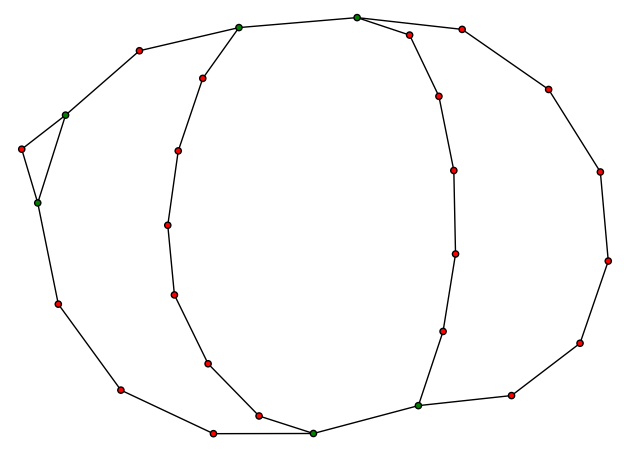

In [9]:
plot_colored_charges(G, c)

In [10]:
G.blocks_and_cut_vertices()

([[0,
   1,
   12,
   2,
   3,
   16,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   23,
   11,
   13,
   26,
   14,
   15,
   17,
   18,
   19,
   27,
   20,
   21,
   22,
   24,
   25]],
 [])

In [11]:
def three_color(G):
    '''
    Return 3 coloring of planar graph G without cycles of length 4, ..., 11.
    Coloring is represented as a dicitionary mapping a vertex to one of the colors 0, 1, 2. 
    '''
    if G.num_verts() == 1:
        return {G.vertices(sort=False)[0]: 0}
    
    G = G.copy()
    
    # find a cutvertex
    blocks, c_vertices = G.blocks_and_cut_vertices()
    if len(c_vertices) > 0:
        cutv = c_vertices[0]
        nbs = G.neighbors(cutv)
        result = dict()
        G.delete_vertex(cutv)
        for C in G.connected_components_subgraphs():
            # color subgraphs such that cutv has color 0
            c = three_color_cv(C, cutv, nbs)  
            for v, color in c.items():
                result[v] = color
        return result
    
    # find a vertex of degree <= 2
    v = min(G.vertices(sort=False), key=lambda v: G.degree(v))
    if G.degree(v) <= 2:
        nbs = G.neighbors(v)
        G.delete_vertex(v)
        c = three_color(G)
        freec = list(set([0, 1, 2]) - set([c[u] for u in nbs]))
        c[v] = freec[0]
        return c
    raise Exception('No substructure')
    
# color G such that cutv has color 0    
def three_color_cv(G, cutv, cutvnbs):
    gverts = set(G.vertices(sort=False))
    G = G.copy()
    G.add_vertex(cutv)
    for u in cutvnbs:
        if u in gverts:
            G.add_edge(cutv, u)
    c = three_color(G)
    cvc = c[cutv] # color of cut vertex, we will change colors such that cvc will be 0
    if cvc == 0:  # ok, cut vertex has color 0
        return c
    cr = dict()
    # switch colors 0 and cvc
    for v, col in c.items():
        if col == cvc:  # color cvc -> color 0
            cr[v] = 0  
        elif col == 0: # color 0 -> color cvc
            cr[v] = cvc
        else:
            cr[v] = col
    return cr
    

In [12]:
Gcoloring = three_color(G)

In [13]:
def plot_colored(G, Gcoloring):
    res = {}
    cnames = ['red', 'green', 'blue']
    for v, c in Gcoloring.items():
        res.setdefault(cnames[c], []).append(v)
    return G.plot(vertex_colors=res)

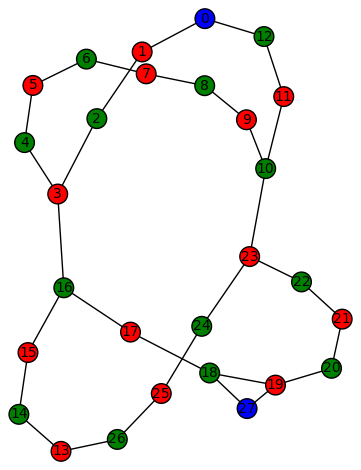

In [14]:
plot_colored(G, Gcoloring)

In [15]:
G2 = graphs.CycleGraph(3) + graphs.PathGraph(11)
G2.add_edges([(0, 3), (0, 13)])

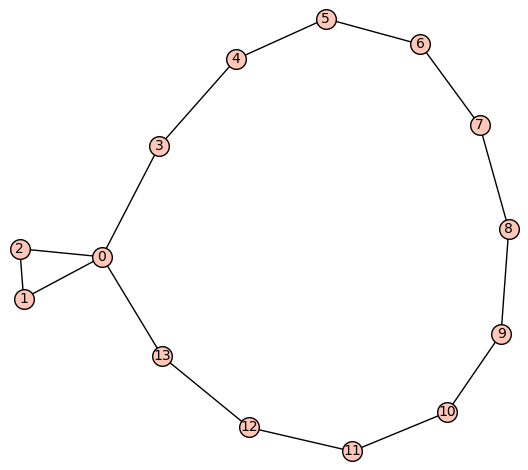

In [16]:
G2.plot()

In [17]:
c0 = initial_charge(G2,)
c = discharge(G2, c0)

In [18]:
G2.girth()

3

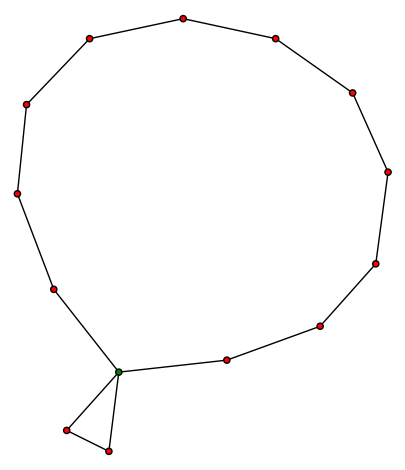

In [19]:
plot_colored_charges(G2, c)

In [20]:
G2coloring = three_color(G2)

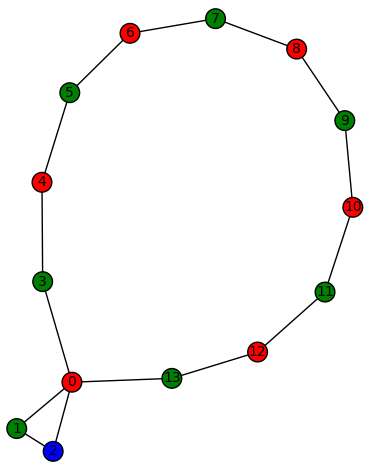

In [21]:
plot_colored(G2, G2coloring)

In [22]:
G3 = graphs.CycleGraph(12) + graphs.CycleGraph(13) + graphs.CycleGraph(22) + graphs.CycleGraph(19) + graphs.CycleGraph(15)
G3.add_edges([(17,41),(17,42),(24,8),(24,7),(30,53),(61,71)])

In [23]:
G3.is_planar()

True

In [24]:

three_color(G3)

{38: 0,
 39: 2,
 37: 2,
 36: 0,
 35: 2,
 34: 0,
 33: 2,
 32: 0,
 31: 2,
 30: 0,
 29: 2,
 28: 0,
 27: 2,
 26: 0,
 25: 2,
 46: 0,
 45: 2,
 44: 0,
 43: 2,
 42: 0,
 41: 2,
 17: 1,
 40: 0,
 53: 2,
 60: 0,
 61: 2,
 59: 2,
 58: 0,
 57: 2,
 56: 0,
 55: 2,
 54: 0,
 52: 0,
 51: 2,
 50: 0,
 49: 2,
 48: 0,
 47: 2,
 65: 0,
 64: 2,
 63: 0,
 62: 1,
 71: 0,
 10: 2,
 11: 1,
 9: 1,
 8: 2,
 7: 1,
 6: 2,
 5: 1,
 4: 2,
 3: 1,
 2: 2,
 1: 1,
 0: 2,
 24: 0,
 23: 1,
 22: 0,
 21: 1,
 20: 0,
 12: 1,
 19: 1,
 18: 0,
 16: 0,
 15: 1,
 14: 0,
 13: 2,
 79: 0,
 80: 1,
 78: 1,
 77: 0,
 76: 1,
 75: 0,
 74: 1,
 73: 0,
 72: 1,
 70: 1,
 69: 0,
 68: 1,
 67: 0,
 66: 2}